In [74]:
import h5py
import numpy as np
from skimage import io
from skimage import transform
import skimage
import cPickle as pickle

In [75]:
ROOT_PATH = './data/train/'

In [76]:
file = h5py.File(ROOT_PATH + 'digitStruct.mat', 'r')

In [77]:
digitStruct = file['/digitStruct']
digitName = digitStruct.get('name')
digitBox = digitStruct.get('bbox')

In [78]:
file = h5py.File(ROOT_PATH + 'digitStruct.mat', 'r')
def get_name(file):
    output_name = []
    digitStruct = file['/digitStruct']
    digitName = digitStruct.get('name')
    digitBox = digitStruct.get('bbox')
    
    # For name
    for name in digitName:
        output_name.append(''.join([chr(v[0]) for v in file[name[0]].value]))
    return output_name

def get_box(file):
    def get_box_data(index, hdf5_data):
        """
        get `left, top, width, height` of each picture
        :param index:
        :param hdf5_data:
        :return:
        """
        meta_data = dict()
        meta_data['height'] = []
        meta_data['label'] = []
        meta_data['left'] = []
        meta_data['top'] = []
        meta_data['width'] = []

        def print_attrs(name, obj):
            vals = []
            if obj.shape[0] == 1:
                vals.append(obj[0][0])
            else:
                for k in range(obj.shape[0]):
                    vals.append(int(hdf5_data[obj[k][0]][0][0]))
            meta_data[name] = vals

        box = hdf5_data['/digitStruct/bbox'][index]
        hdf5_data[box[0]].visititems(print_attrs)
        return meta_data
    output_box = []
    for i in range(digitBox.shape[0]):
        box = get_box_data(i, file)
        output_box.append(box)
    return output_box

In [79]:
output_box = get_box(file)
output_name = get_name(file)


In [80]:
len(output_box)

33402

In [81]:
len(output_name)

33402

In [82]:
IMAGE_WIDTH = 54
IMAGE_HEIGHT = 54
train_dataset = np.zeros((len(output_box), IMAGE_HEIGHT, IMAGE_WIDTH, 1))
for i in range(len(output_box)):
    file_name = output_name[i]
    box = output_box[i]
    img = io.imread(ROOT_PATH + file_name, as_grey=True)
    img = transform.resize(img, output_shape=(IMAGE_HEIGHT, IMAGE_WIDTH))
    img = skimage.img_as_float(img)
    img = img.reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 1))
    train_dataset[i, :, :, :] = img
print('Done')

Done


In [83]:
train_dataset[20, :, :, 0].shape

(54, 54)

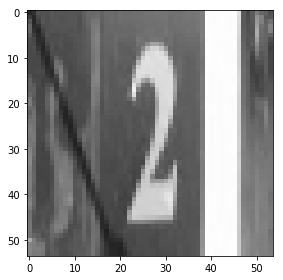

In [84]:
io.imshow(train_dataset[20, :, :, 0])
io.show()

In [85]:
train_labels = np.zeros((len(output_box)), dtype=int)
for i in range(len(output_box)):
    box = output_box[i]
    try:
        train_labels[i] = int(''.join(map(lambda x: str(int(x)), box['label'])))
    except:
        print(box['label'])
        print('index' + str(i))
        train_labels[i] = -1
print('Done')


Done


In [86]:
training = (train_dataset, train_labels)
pickle.dump(training, open('./data/training.pkl', 'wb'))

In [87]:
train_labels[22]

47

In [88]:
int(str(int(output_box[20]['label'][0])))

2

In [89]:
train_labels[20]

2